In [15]:
import pandas as pd 
import numpy as np 
import tensorflow as td 
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import cv2 as cv2 
from matplotlib import pyplot as plt 
import numpy as np 
from sklearn.model_selection import KFold 


In [2]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(trainX.shape)

(60000, 28, 28)


In [4]:
print(trainY.shape)

(60000,)


9


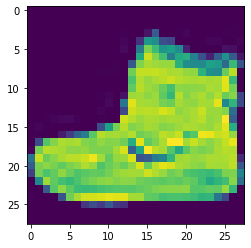

In [5]:
plt.imshow(trainX[0])
print(trainY[0])

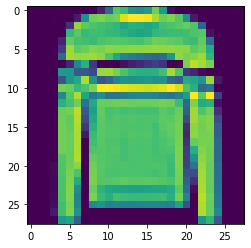

In [6]:
plt.imshow(trainX[5])

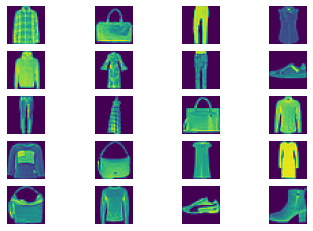

In [9]:
for i in range(0, 20):
  vals = np.random.randint(0, len(trainX))
  plt.subplot(5, 4, i+1)
  plt.imshow(trainX[vals])
  plt.axis('off')


In [11]:
trainX = trainX.reshape((trainX.shape[0], 28, 28,1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [12]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm /255.0
test_norm = test_norm /255.0

In [13]:
train_norm[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [16]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer ='he_uniform', input_shape= (28, 28, 1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.02, momentum = 0.9)
model.compile(optimizer= opt, loss = 'categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [19]:
def evaluation_model(dataX, dataY, n_folds):
  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  for train_ix, test_ix in kfold.split(dataX):
    train_X, train_Y, test_X, test_Y = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    history = model.fit(train_X, train_Y, epochs = 10, batch_size=32, validation_data=(test_X, test_Y), verbose=2)
    _, acc = model.evaluate(test_X, test_Y, verbose=2)
    print("Accuracy :", (acc*100.0))
    scores.append(acc)
    histories.append(history)
  return(scores, histories)

In [20]:
hist, score = evaluation_model(train_norm, trainY, 5)

Epoch 1/2
1500/1500 - 30s - loss: 0.4226 - accuracy: 0.8484 - val_loss: 0.3308 - val_accuracy: 0.8802 - 30s/epoch - 20ms/step
Epoch 2/2
1500/1500 - 28s - loss: 0.2895 - accuracy: 0.8945 - val_loss: 0.2860 - val_accuracy: 0.8939 - 28s/epoch - 19ms/step
375/375 - 2s - loss: 0.2860 - accuracy: 0.8939 - 2s/epoch - 6ms/step
Accuracy : 89.3916666507721
Epoch 1/2
1500/1500 - 29s - loss: 0.2575 - accuracy: 0.9045 - val_loss: 0.2401 - val_accuracy: 0.9099 - 29s/epoch - 19ms/step
Epoch 2/2
1500/1500 - 28s - loss: 0.2272 - accuracy: 0.9158 - val_loss: 0.2681 - val_accuracy: 0.8974 - 28s/epoch - 19ms/step
375/375 - 2s - loss: 0.2681 - accuracy: 0.8974 - 2s/epoch - 7ms/step
Accuracy : 89.74166512489319
Epoch 1/2
1500/1500 - 28s - loss: 0.2137 - accuracy: 0.9200 - val_loss: 0.2136 - val_accuracy: 0.9193 - 28s/epoch - 19ms/step
Epoch 2/2
1500/1500 - 28s - loss: 0.1870 - accuracy: 0.9309 - val_loss: 0.2061 - val_accuracy: 0.9243 - 28s/epoch - 19ms/step
375/375 - 2s - loss: 0.2061 - accuracy: 0.9243 - 